In [280]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split


from sklearn.feature_selection import chi2
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC                            
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from imblearn.over_sampling import RandomOverSampler

In [281]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
pd.set_option('display.max_columns',29)

# Data Collection

In [282]:
df = pd.read_csv("kidney.csv")

In [283]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# Data Analysis 

In [284]:
df.shape

(400, 26)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [286]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Observations:**
- There are many null values in our dataset. We will replace null values in Data Preprocessing part.

In [287]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [288]:
df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [289]:
for i in df.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

# Cleaning DataSet

## Replacing "\t"

In [290]:
df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']] = df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']].replace(to_replace={'\t8400':'8400', '\t6200':'6200', '\t43':'43', '\t?':np.nan, '\tyes':'yes', '\tno':'no', 'ckd\t':'ckd', ' yes':'yes'})

In [291]:
for i in df.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

## Handling Null Values

- Lets check null values in form of a graph first

### Age

<Axes: xlabel='age', ylabel='Density'>

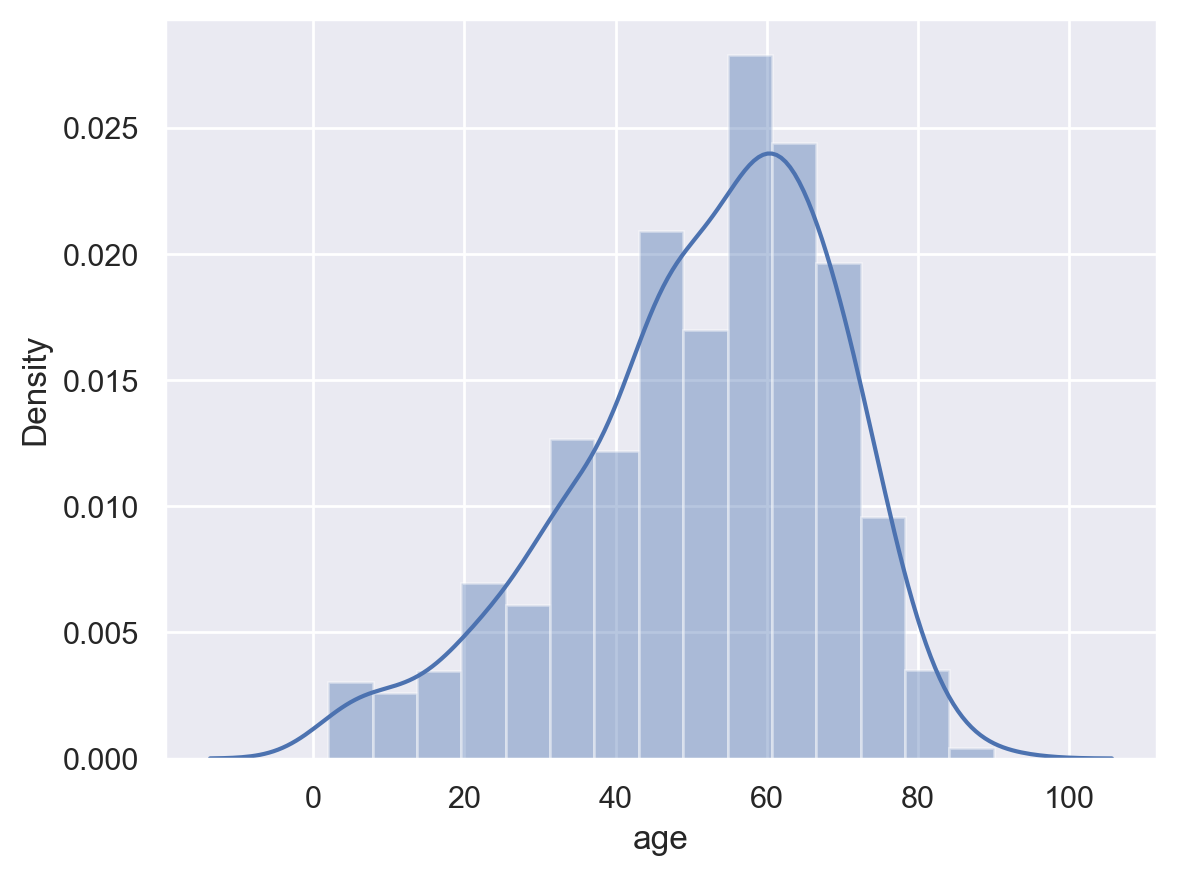

In [292]:
sns.distplot(df.age)

- As data seems little negative skewed, we will replace age null values with median

In [293]:
df["age"] = df["age"].replace(np.NaN, df["age"].median())

### Blood Pressure (bp)

In [294]:
df.bp.unique()

array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])

In [295]:
df.bp.mode()[0]

80.0

In [296]:
df.bp = df.bp.replace(np.NaN, df.bp.mode()[0])

### Specific Gravity (sg)

In [297]:
df.sg.unique()

array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])

In [298]:
df.sg.mode()[0]

1.02

In [299]:
df.sg = df.sg.replace(np.NaN, df.sg.mode()[0])

### Aluminium (al)

In [300]:
df.al.unique()

array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

In [301]:
df.al.mode()[0]

0.0

In [302]:
df.al = df.al.replace(np.NaN, df.al.mode()[0])

### Sugar (su)

In [303]:
df.su.unique()

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

In [304]:
df.su.mode()[0]

0.0

In [305]:
df.su = df.su.replace(np.NaN, df.su.mode()[0])

### Red blood cell (rbc)

In [306]:
df.su.unique()

array([0., 3., 4., 1., 2., 5.])

In [307]:
df.rbc.mode()[0]

'normal'

In [308]:
df.rbc = df.rbc.replace(np.NaN, df.rbc.mode()[0])

### pc

In [309]:
df.pc.unique()

array(['normal', 'abnormal', nan], dtype=object)

In [310]:
df.pc.mode()[0]

'normal'

In [311]:
df.pc = df.pc.replace(np.NaN, df.pc.mode()[0])

### pcc

In [312]:
df.pcc.unique()

array(['notpresent', 'present', nan], dtype=object)

In [313]:
df.pcc.mode()[0]

'notpresent'

In [314]:
df.pcc = df.pcc.replace(np.NaN, df.pcc.mode()[0])

### ba

In [315]:
df.ba.unique()

array(['notpresent', 'present', nan], dtype=object)

In [316]:
df.ba.mode()[0]

'notpresent'

In [317]:
df.ba = df.ba.replace(np.NaN, df.ba.mode()[0])

### bgr

<Axes: xlabel='bgr', ylabel='Density'>

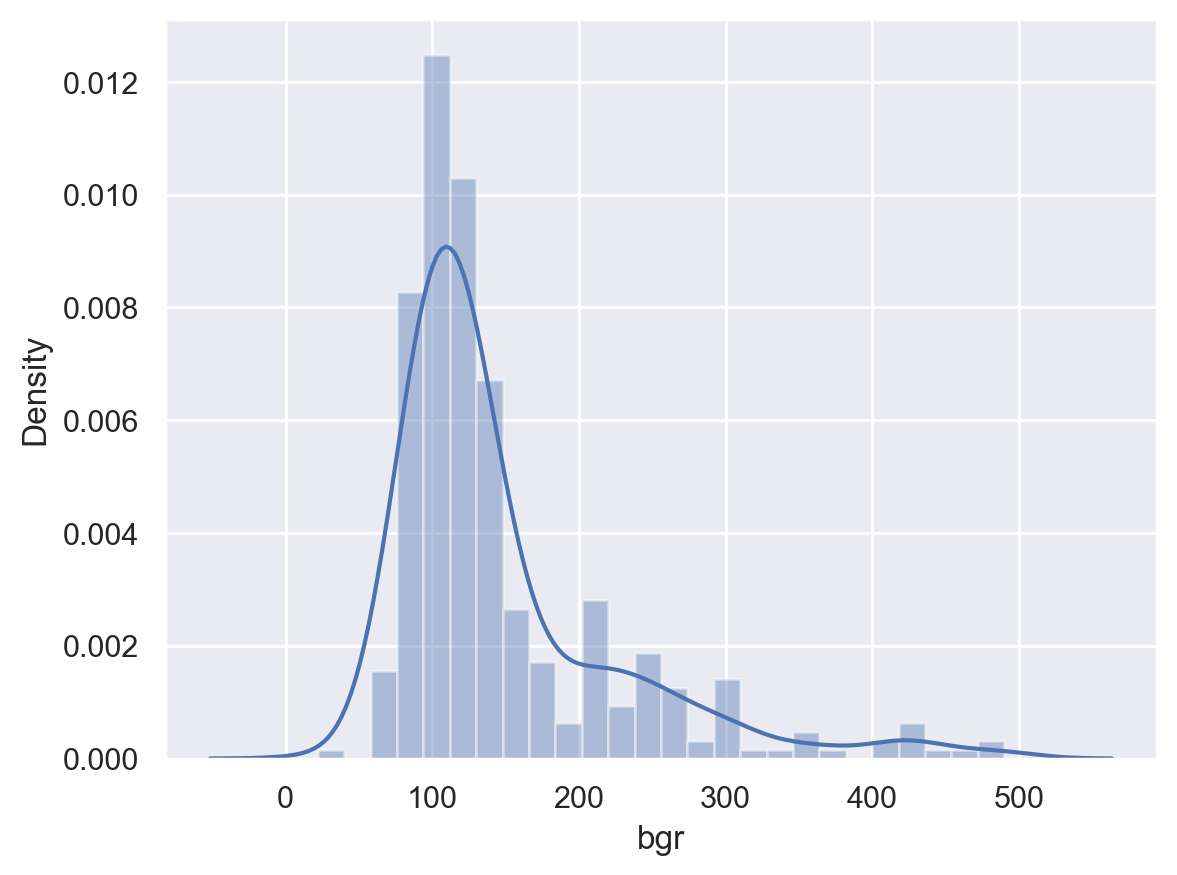

In [318]:
sns.distplot(df.bgr)

In [319]:
df.bgr.median()

121.0

In [320]:
df.bgr = df.bgr.replace(np.NaN, df.bgr.median())

### bu

<Axes: xlabel='bu', ylabel='Density'>

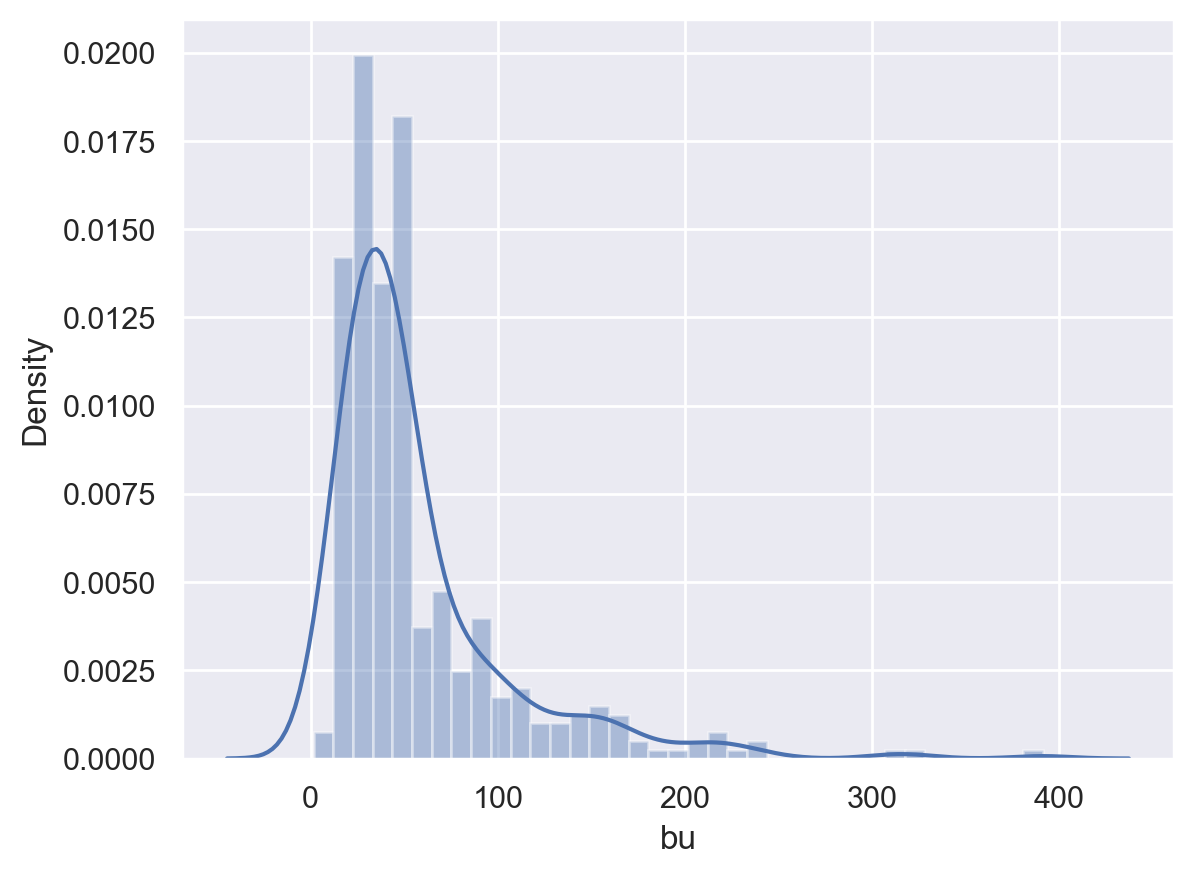

In [321]:
sns.distplot(df.bu)

In [322]:
df.bu.median()

42.0

In [323]:
df.bu = df.bu.replace(np.NaN, df.bu.median())

### sc

<Axes: xlabel='sc', ylabel='Density'>

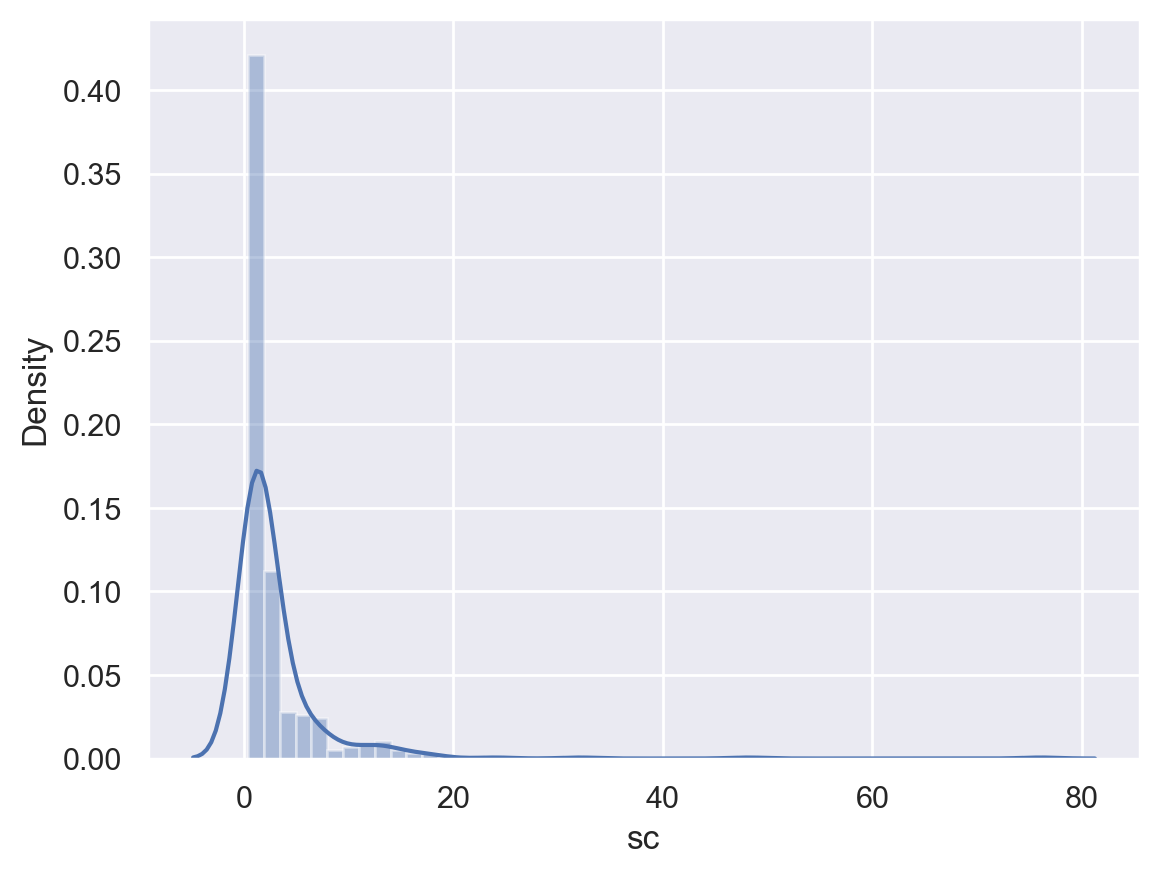

In [324]:
sns.distplot(df.sc)

In [325]:
df.sc.median()

1.3

In [326]:
df.sc = df.sc.replace(np.NaN, df.sc.median())

### sod

<Axes: xlabel='sod', ylabel='Density'>

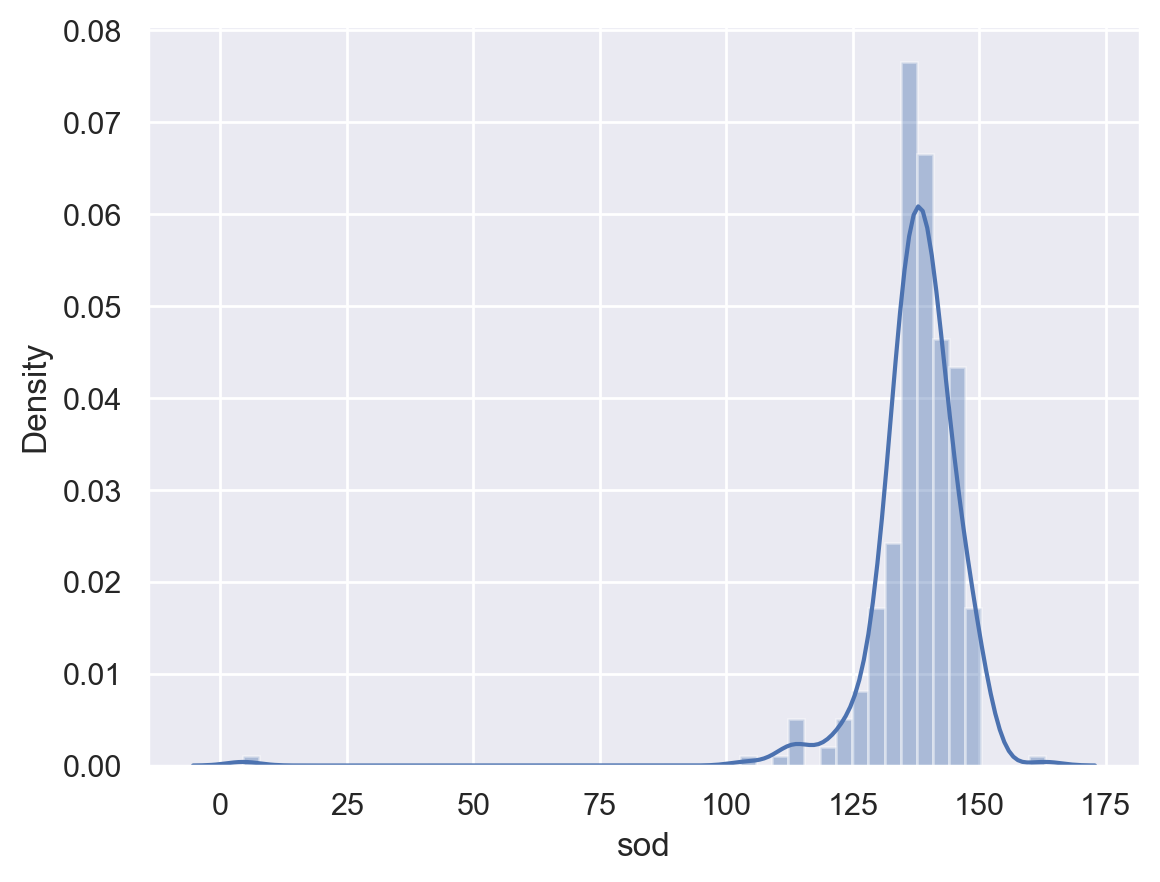

In [327]:
sns.distplot(df.sod)

In [328]:
df.sod.median()

138.0

In [329]:
df.sod = df.sod.replace(np.NaN, df.sod.median())

### pot

<Axes: xlabel='pot', ylabel='Density'>

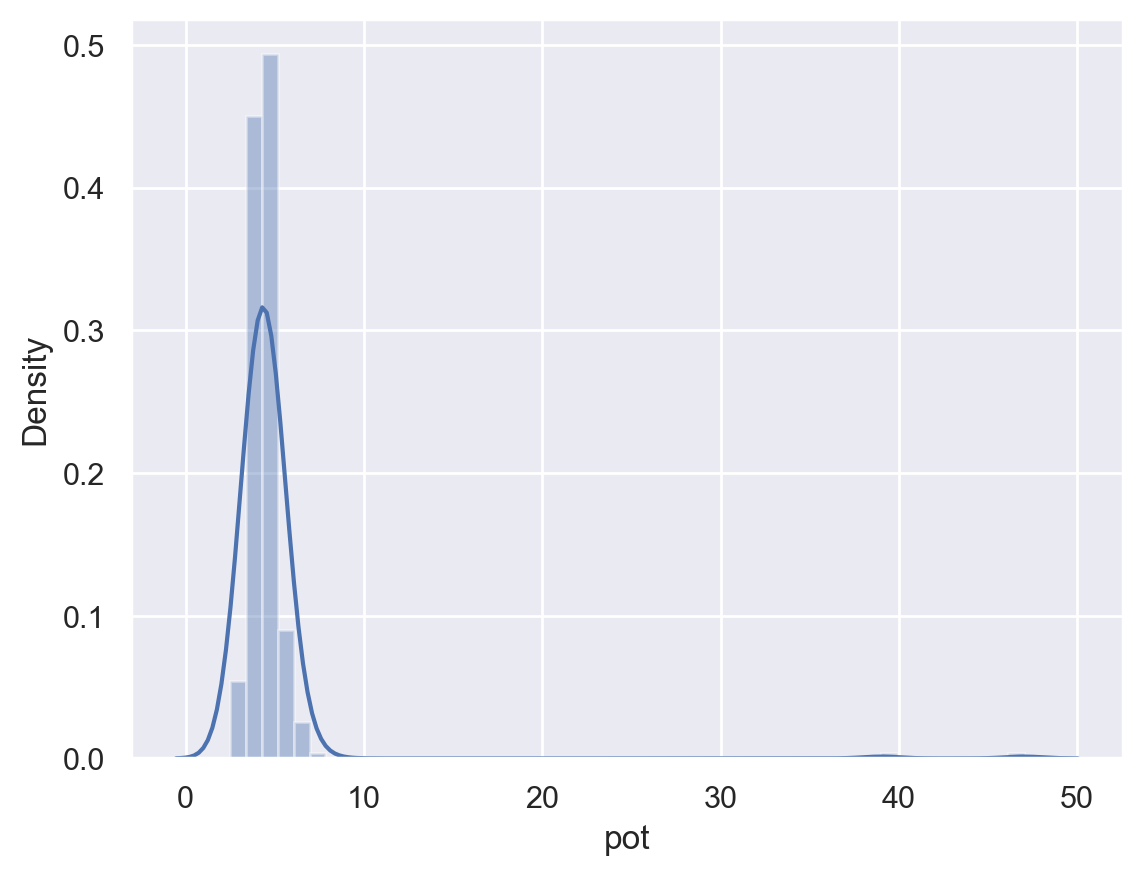

In [330]:
sns.distplot(df.pot)

In [331]:
df.pot.median()

4.4

In [332]:
df.pot = df.pot.replace(np.NaN, df.pot.median())

### hemo

<Axes: xlabel='hemo', ylabel='Density'>

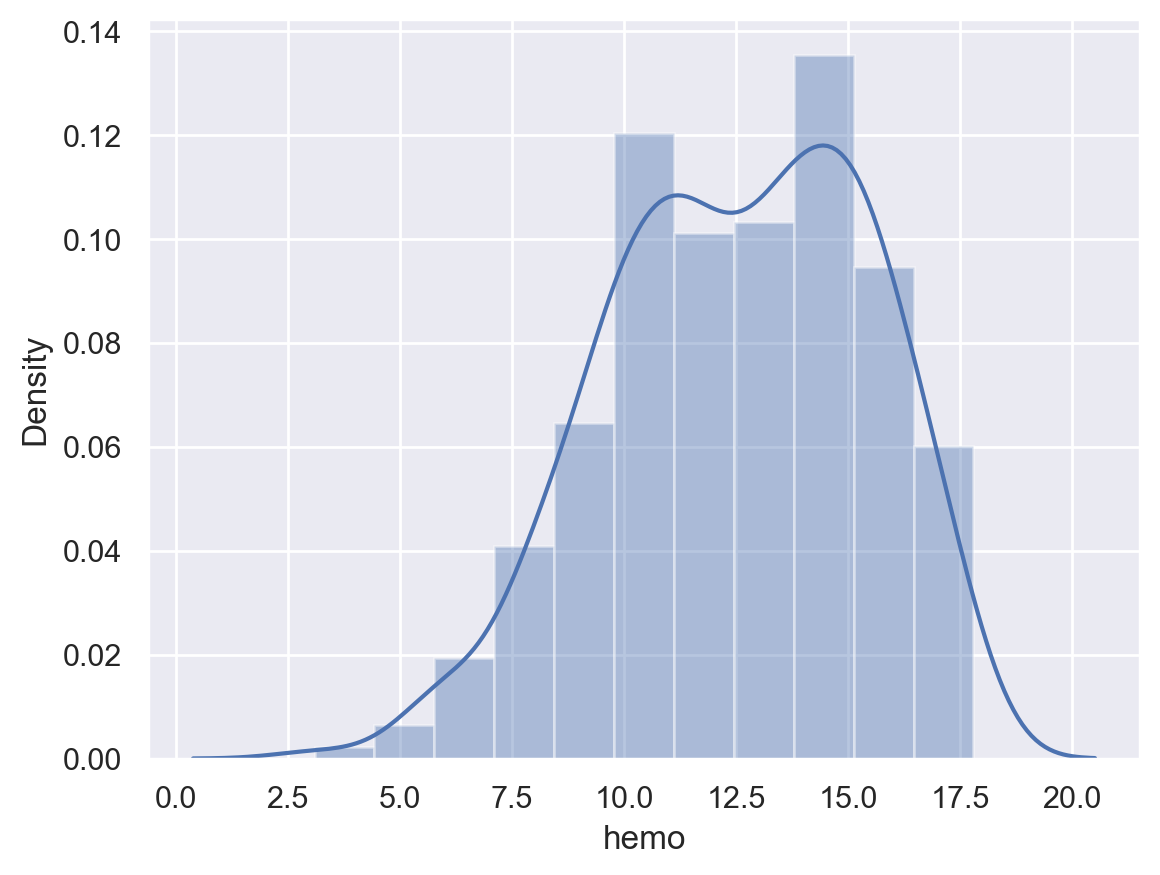

In [333]:
sns.distplot(df.hemo)

In [334]:
df.hemo.skew(skipna = True)

-0.3350946791593011

In [335]:
df.hemo.median()

12.649999999999999

In [336]:
df.hemo = df.hemo.replace(np.NaN, df.hemo.median())

### pcv

<Axes: xlabel='pcv', ylabel='Density'>

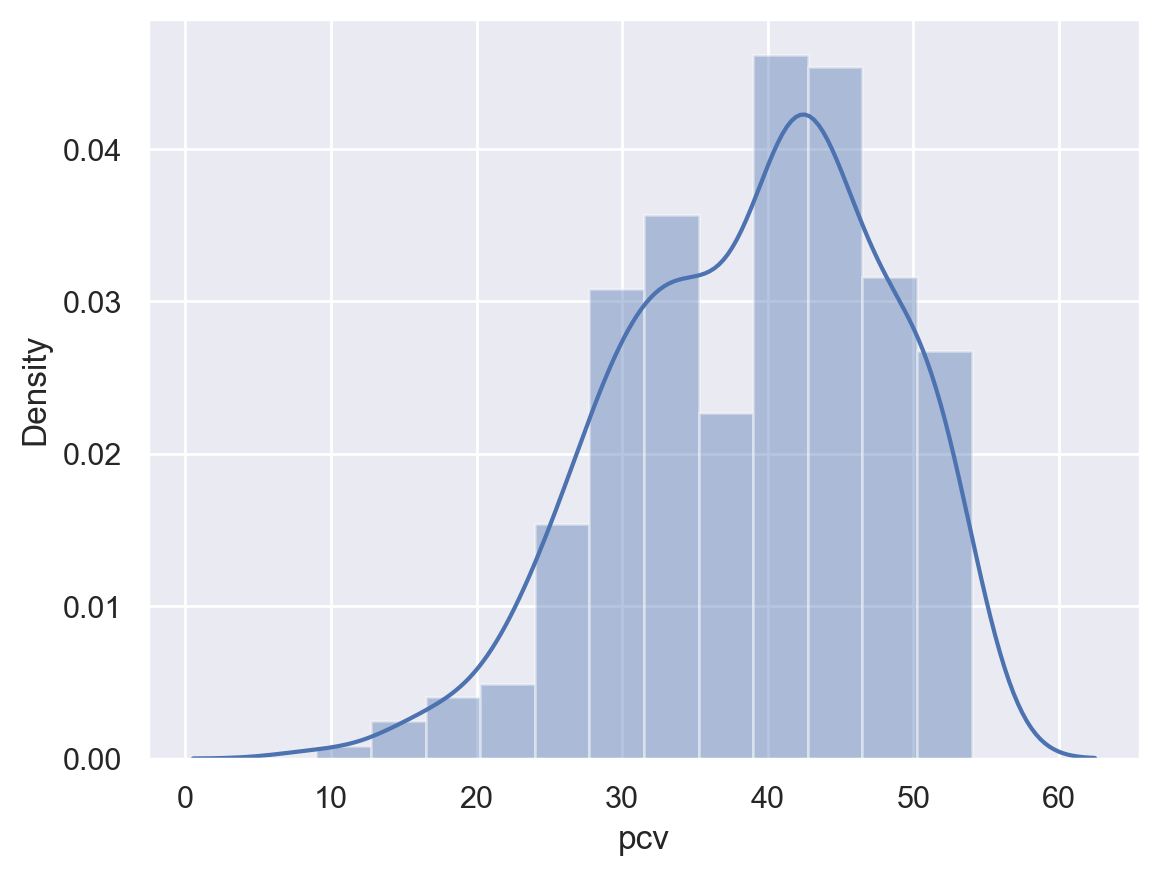

In [337]:
sns.distplot(df.pcv)

In [338]:
df.pcv.skew(skipna = True)

-0.4336785974434392

In [339]:
df.pcv.median()

40.0

In [340]:
df.pcv = df.pcv.replace(np.NaN, df.pcv.median())

### wc

<Axes: xlabel='wc', ylabel='Density'>

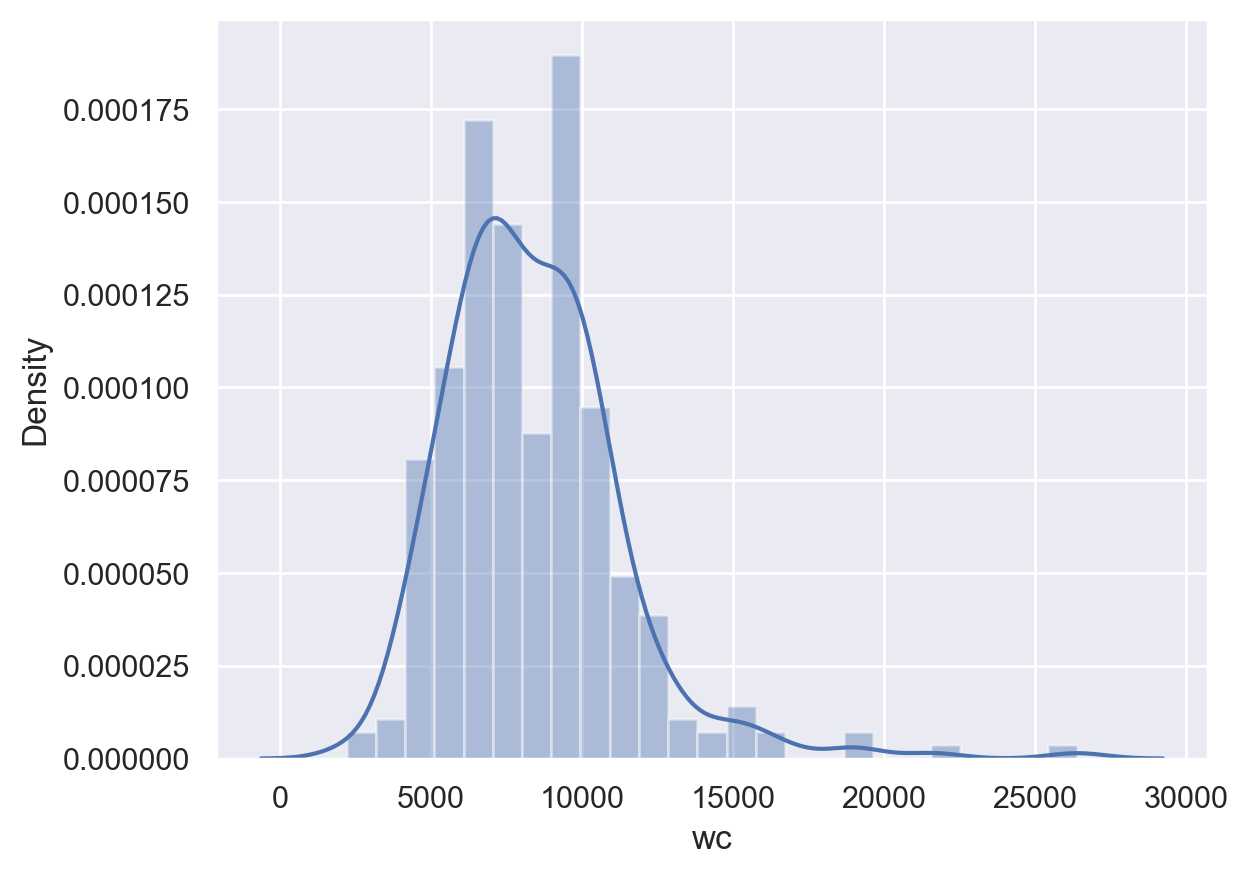

In [341]:
sns.distplot(df.wc)

In [342]:
df.wc.median()

8000.0

In [343]:
df.wc = df.wc.replace(np.NaN, df.wc.median())

### rc

<Axes: xlabel='rc', ylabel='Density'>

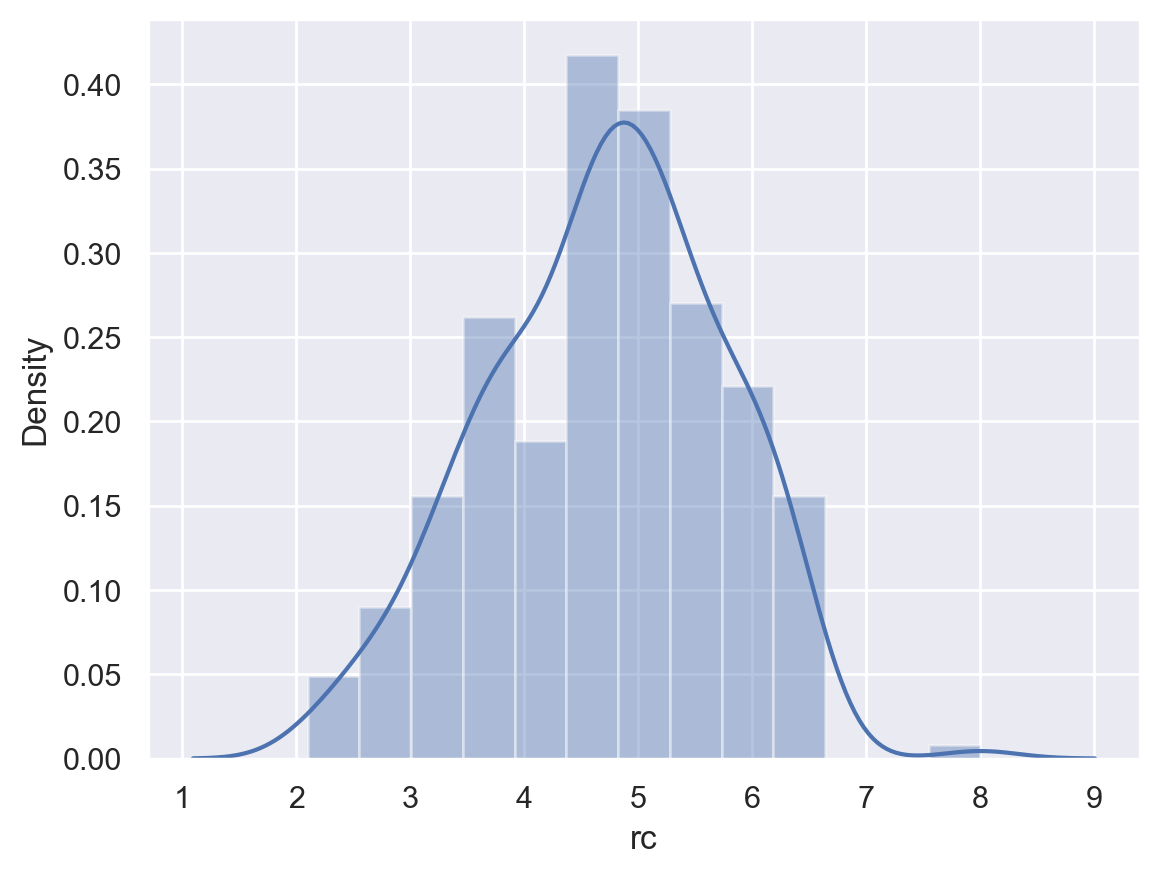

In [344]:
sns.distplot(df.rc)

In [345]:
df.rc.skew(skipna = True)

-0.1833293207517324

In [346]:
df.rc.median()

4.8

In [347]:
df.rc = df.rc.replace(np.NaN, df.rc.median())

### htn

In [348]:
df.htn.unique()

array(['yes', 'no', nan], dtype=object)

In [349]:
df.htn.mode()

0    no
Name: htn, dtype: object

In [350]:
df.htn = df.htn.replace(np.NaN, df.htn.mode()[0])

### dm

In [351]:
df.dm.mode()

0    no
Name: dm, dtype: object

In [352]:
df.dm = df.dm.replace(np.NaN, df.dm.mode()[0])

### cad

In [353]:
df.cad.unique()

array(['no', 'yes', nan], dtype=object)

In [354]:
df.cad.mode()

0    no
Name: cad, dtype: object

In [355]:
df.cad = df.cad.replace(np.NaN, df.cad.mode()[0])

### appet

In [356]:
df.appet.unique()

array(['good', 'poor', nan], dtype=object)

In [357]:
df.appet.mode()

0    good
Name: appet, dtype: object

In [358]:
df.appet = df.appet.replace(np.NaN, df.appet.mode()[0])

### pe

In [359]:
df.pe.unique()

array(['no', 'yes', nan], dtype=object)

In [360]:
df.pe.mode()

0    no
Name: pe, dtype: object

In [361]:
df.pe = df.pe.replace(np.NaN, df.pe.mode()[0])

### ane

In [362]:
df.ane.unique()

array(['no', 'yes', nan], dtype=object)

In [363]:
df.ane.mode()

0    no
Name: ane, dtype: object

In [364]:
df.ane = df.ane.replace(np.NaN, df.ane.mode()[0])

In [365]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

- All null values are replaced by using forward fill method and backward fill method.

## Handling Dtypes

In [366]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [367]:
for i in df.columns:
    print('Unique Values in "{}":\n'.format(i), df[i].unique(), "\n-----------------------------------------------------\n")

Unique Values in "id":
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 24

**Observations:**
- pcv, wc, and rc column should have dtype of float as it contains all integer but it is of object type. We have to correct this.

In [368]:
df['rc'] = df['rc'].astype('float64')
df[['pcv', 'wc', 'age']] = df[['pcv', 'wc', 'age']].astype('int64')
df.dtypes

id                  int64
age                 int64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [369]:
display(df['pcv'].unique())
display(df['wc'].unique())
display(df['rc'].unique())

array([44, 38, 31, 32, 35, 39, 36, 33, 29, 28, 40, 16, 24, 37, 30, 34, 45,
       27, 48, 52, 14, 22, 18, 42, 17, 46, 23, 19, 25, 41, 26, 15, 21, 43,
       20, 47,  9, 49, 50, 53, 51, 54], dtype=int64)

array([ 7800,  6000,  7500,  6700,  7300,  8000,  6900,  9600, 12100,
        4500, 12200, 11000,  3800, 11400,  5300,  9200,  6200,  8300,
        8400, 10300,  9800,  9100,  7900,  6400,  8600, 18900, 21600,
        4300,  8500, 11300,  7200,  7700, 14600,  6300,  7100, 11800,
        9400,  5500,  5800, 13200, 12500,  5600,  7000, 11900, 10400,
       10700, 12700,  6800,  6500, 13600, 10200,  9000, 14900,  8200,
       15200,  5000, 16300, 12400, 10500,  4200,  4700, 10900,  8100,
        9500,  2200, 12800, 11200, 19100, 12300, 16700,  2600, 26400,
        8800,  7400,  4900, 12000, 15700,  4100,  5700, 11500,  5400,
       10800,  9900,  5200,  5900,  9300,  9700,  5100,  6600],
      dtype=int64)

array([5.2, 4.8, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 5.4, 6.1, 6.2, 6.3, 5.1, 5.8,
       5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

## Dropping unnecessary columns

In [370]:
df.drop('id',axis=1,inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,38,6000,4.8,no,no,no,good,no,no,ckd
2,62,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,31,7500,4.8,no,yes,no,poor,no,yes,ckd
3,48,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# Data Visualization

<Axes: xlabel='classification', ylabel='count'>

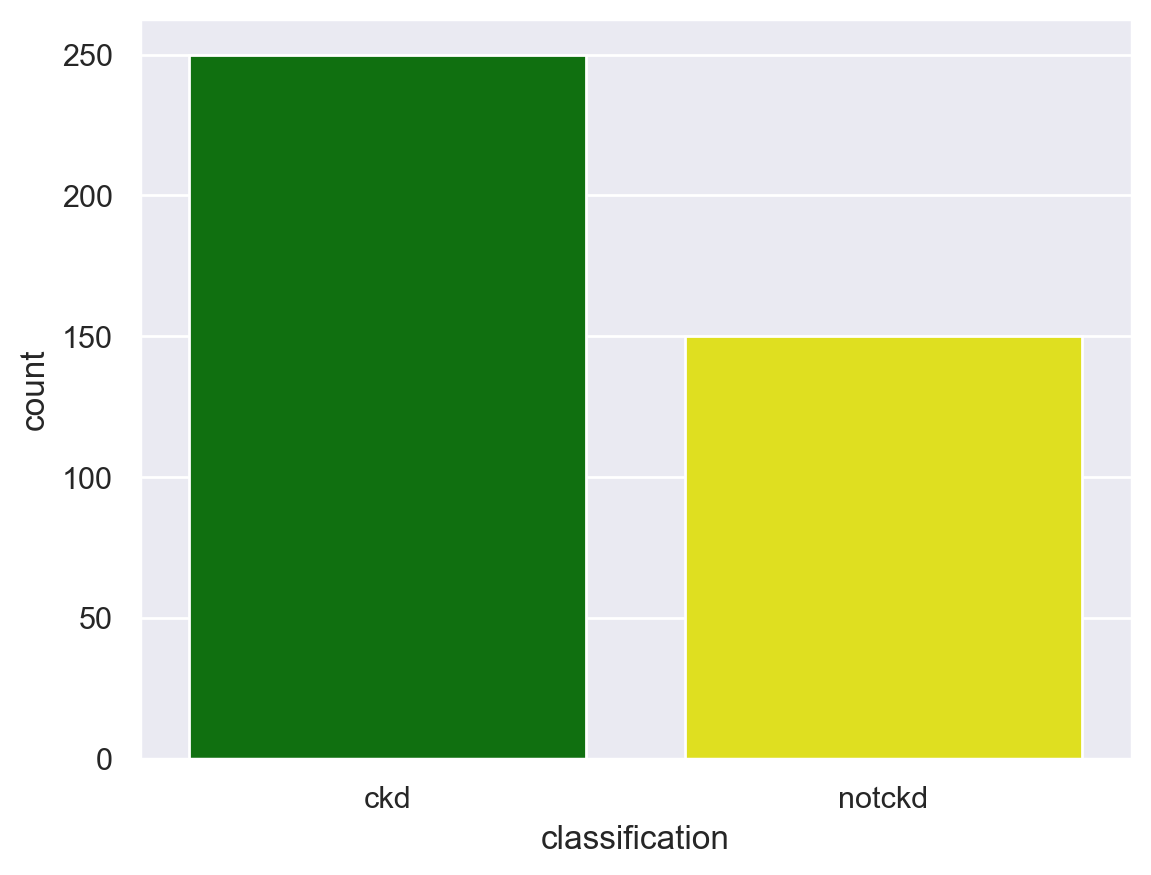

In [371]:
sns.countplot(x = "classification", data = df, palette=['green', 'yellow'])

#### Spearman

<Axes: title={'center': 'Chronic Kidney Disease Attributes Correlation'}>

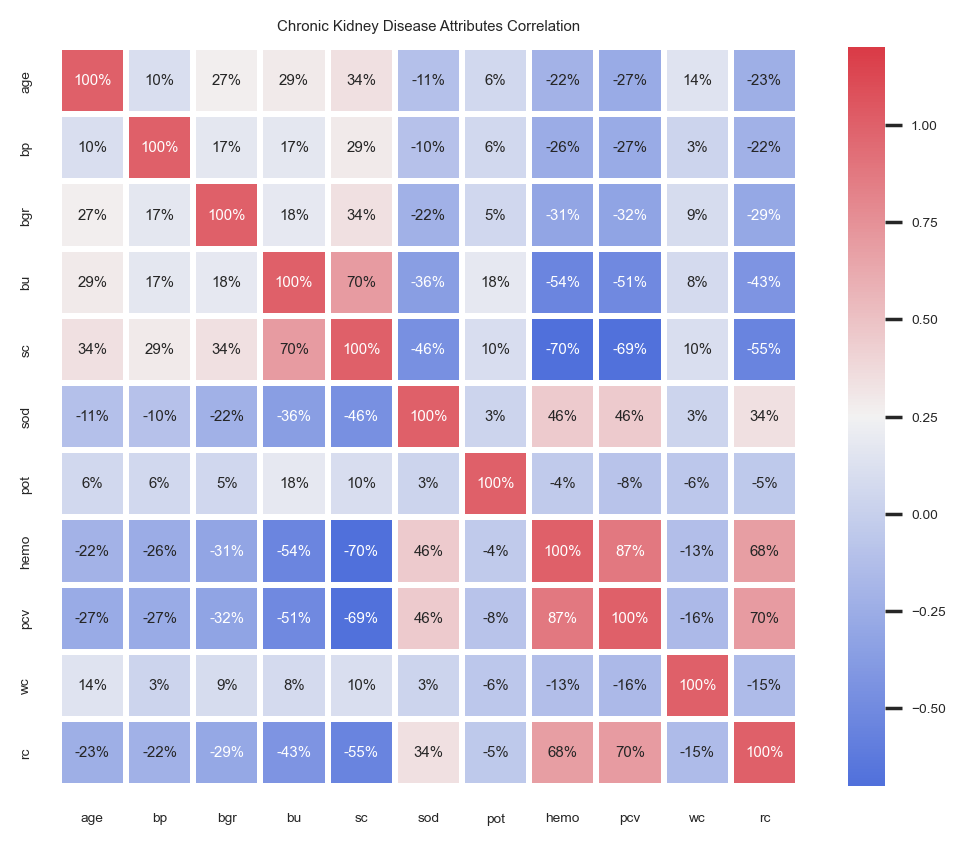

In [372]:
sns.set(font_scale=0.45)
plt.title('Chronic Kidney Disease Attributes Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df[["age","bp","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc"]].corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)

In [373]:


def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [374]:
corr_features = correlation(df, 0.85)
corr_features

{'pcv'}

# Label Encoding

In [375]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,38,6000,4.8,no,no,no,good,no,no,ckd
2,62,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,31,7500,4.8,no,yes,no,poor,no,yes,ckd
3,48,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [376]:
col = ['rbc', 'pcc', 'pc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane']
encoder = LabelEncoder()
for col in col:
    df[col] = encoder.fit_transform(df[col])

In [377]:
df[['appet', 'classification']] = df[['appet', 'classification']].replace(to_replace={'good':'1', 'ckd':'1', 'notckd':'0', 'poor':'0'})

In [378]:
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80.0,1.02,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44,7800,5.2,1,1,0,1,0,0,1
1,7,50.0,1.02,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38,6000,4.8,0,0,0,1,0,0,1


In [379]:
df.dtypes

age                 int64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                 int32
dm                  int32
cad                 int32
appet              object
pe                  int32
ane                 int32
classification     object
dtype: object

In [380]:
df[['classification', 'appet']] = df[['classification', 'appet']].astype('int64')

## Feature Selection
### Relation among numerical and classification column

In [381]:
df_anova = df[["age","bp","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","classification"]]
grps = pd.unique(df_anova.classification.values)
grps

for i in range(len(df_anova.columns)-1):
    
    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.classification == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and Classification".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and Classification \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and Classification \n".format(df_anova.columns[i]))

P_Value of age and Classification 4.159405859198484e-06
There is relation between age and Classification 

P_Value of bp and Classification 2.1239118488998354e-09
There is relation between bp and Classification 

P_Value of bgr and Classification 3.894547360688507e-15
There is relation between bgr and Classification 

P_Value of bu and Classification 2.2322380822924144e-14
There is relation between bu and Classification 

P_Value of sc and Classification 2.923398800947858e-09
There is relation between sc and Classification 

P_Value of sod and Classification 6.129139402641425e-12
There is relation between sod and Classification 

P_Value of pot and Classification 0.1930314179728708
There is no relation between pot and Classification 

P_Value of hemo and Classification 8.421310878217525e-67
There is relation between hemo and Classification 

P_Value of pcv and Classification 4.1265381546572214e-54
There is relation between pcv and Classification 

P_Value of wc and Classification 0.000

In [382]:
x = np.array(df.pot)
y = np.array(df.classification)
_, p = stats.pointbiserialr(x, y)
print(p)

if p < 0.05:
    print("There is relation between Potassium and Classification \n")
else:
    print("There is no relation between Potassium and Classification \n")

0.19303141797279627
There is no relation between Potassium and Classification 



In [383]:
df.drop(["pcv","pot"], axis=1, inplace=True)
display(df.head())
df.shape

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,15.4,7800,5.2,1,1,0,1,0,0,1
1,7,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,11.3,6000,4.8,0,0,0,1,0,0,1
2,62,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,9.6,7500,4.8,0,1,0,0,0,1,1
3,48,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,11.2,6700,3.9,1,0,0,0,1,1,1
4,51,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,11.6,7300,4.6,0,0,0,1,0,0,1


(400, 23)

# Seperating target feature

In [384]:
X = df.drop("classification", axis=1)
y = df["classification"]
display(X)
display(y)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,48,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,15.4,7800,5.2,1,1,0,1,0,0
1,7,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,11.3,6000,4.8,0,0,0,1,0,0
2,62,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,9.6,7500,4.8,0,1,0,0,0,1
3,48,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,11.2,6700,3.9,1,0,0,0,1,1
4,51,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,11.6,7300,4.6,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,15.7,6700,4.9,0,0,0,1,0,0
396,42,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,16.5,7800,6.2,0,0,0,1,0,0
397,12,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,15.8,6600,5.4,0,0,0,1,0,0
398,17,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,14.2,7200,5.9,0,0,0,1,0,0


0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

## Relation between categorical column

In [385]:
f_p_values=chi2(X[['sg', 'al', 'su', 'rbc', 'pcc', 'pc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane', 'appet']],y)

p_values = pd.Series(f_p_values[1])
p_values.index = ['sg', 'al', 'su', 'rbc', 'pcc', 'pc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane', 'appet']
p_values.sort_values(ascending=False)

sg       9.434296e-01
rbc      5.266006e-02
pc       1.073502e-03
appet    3.682474e-04
ba       2.799491e-04
cad      6.282980e-06
pcc      5.168220e-07
ane      1.973175e-09
pe       1.450416e-11
dm       1.229899e-19
htn      5.915991e-21
su       2.106256e-22
al       6.744058e-49
dtype: float64

In [386]:
# Null Hypothesis: The null hypothesis states that there is no relationship between the two variables
cnt = 0
for i in p_values:
    if i > 0.05:
        print("There is no relationship", p_values.index[cnt], i)
    else:
        print("There is relationship", p_values.index[cnt], i)
    
    cnt += 1

There is no relationship sg 0.9434296212554516
There is relationship al 6.744057652239431e-49
There is relationship su 2.1062564232073927e-22
There is no relationship rbc 0.052660056620230336
There is relationship pcc 5.16821975381135e-07
There is relationship pc 0.0010735022801971507
There is relationship ba 0.00027994911788008583
There is relationship htn 5.9159906568766745e-21
There is relationship dm 1.2298987440045423e-19
There is relationship cad 6.28297952984215e-06
There is relationship pe 1.4504158047731098e-11
There is relationship ane 1.9731752900753933e-09
There is relationship appet 0.0003682474162699459


In [387]:
p_values.index

Index(['sg', 'al', 'su', 'rbc', 'pcc', 'pc', 'ba', 'htn', 'dm', 'cad', 'pe',
       'ane', 'appet'],
      dtype='object')

In [388]:
df.drop("sg", axis=1, inplace=True)
display(df.head(2))
df.shape

,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80.0,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,15.4,7800,5.2,1,1,0,1,0,0,1
1,7,50.0,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,11.3,6000,4.8,0,0,0,1,0,0,1


(400, 22)

### Dropping constant feature

In [389]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

var_thres.get_support()

print(df.columns[var_thres.get_support()])


constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))
print("Shape: ", df.shape)

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'hemo', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')
[]
0
Shape:  (400, 22)


# Standardization, Splitting, and Balancing data

## Seperating target

In [390]:
X = df.drop("classification", axis=1)
y = df["classification"]

## Standardization of the data

In [391]:
scaler = StandardScaler()
features = scaler.fit_transform(X)
features

array([[-0.21003135,  0.25421378,  0.07624929, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.62723421, -1.97247624,  2.36372784, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.615355  ,  0.25421378,  0.83874214, ..., -1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.33245337,  0.25421378, -0.68624357, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.03767254, -1.23024623, -0.68624357, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.37953033,  0.25421378, -0.68624357, ...,  0.50780078,
        -0.4843221 , -0.42008403]])

- We will also standardize the data by using StandardScaler. This will help in increasing the performance of the model and increasing accuracy.

## Splitting the data into train and test data

In [392]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42) 

In [393]:
from imblearn.under_sampling import RandomUnderSampler

### Over Sampling

In [394]:
os =  RandomOverSampler(sampling_strategy=1)

X_train, y_train = os.fit_resample(X_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(X_train))

174 174
348


# Model Building

## Decision Tree Classifier

In [395]:
def dtree_grid_search(X, y):
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [396]:
dtree_grid_search(X_train, y_train)

{'criterion': 'entropy', 'max_depth': 9}

###  Decision Tree

In [397]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11)
dTree.fit(X_train, y_train)

print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

1.0
0.9833333333333333
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.97      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [398]:
dt_tacc = dTree.score(X_test,y_test)
dt_train_acc = dTree.score(X_train, y_train)

#### Confusion Matrix of Decision Tree Classifier

<Axes: >

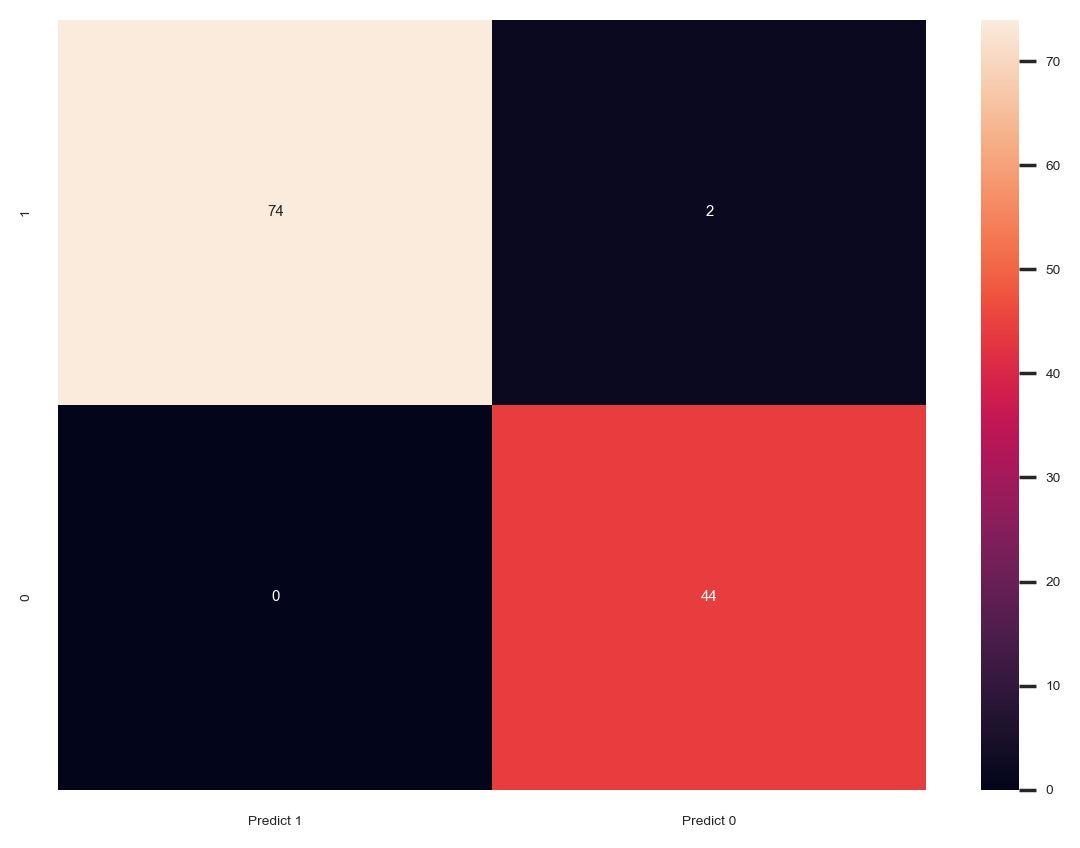

In [399]:
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### AUC of DecisionTree Model

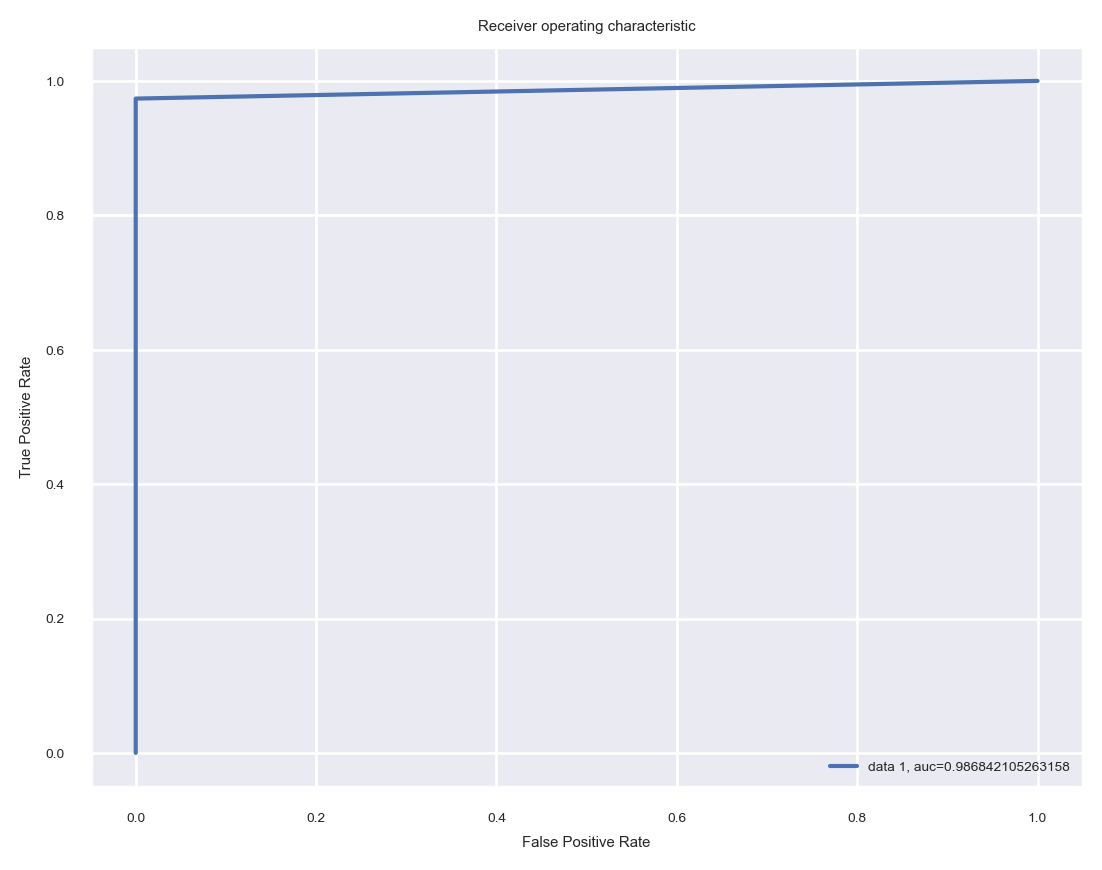

In [400]:
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [401]:
dt_auc = auc
dt_auc

0.986842105263158

## kNN

In [402]:
def knn_grid_search(X, y):
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)    
    knn = KNeighborsClassifier()
    knn_gscv = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)    
    knn_gscv.fit(X, y)
    
    return knn_gscv.best_params_

In [403]:
knn_grid_search(X_train, y_train)

{'n_neighbors': 1}

### kNN

In [404]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_knn))

1.0
0.9333333333333333
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.97      0.92      0.95        76

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [405]:
knn_tacc = knn.score(X_test, y_test)
knn_train_acc = knn.score(X_train, y_train)

#### Confusion Matrix of kNN

<Axes: >

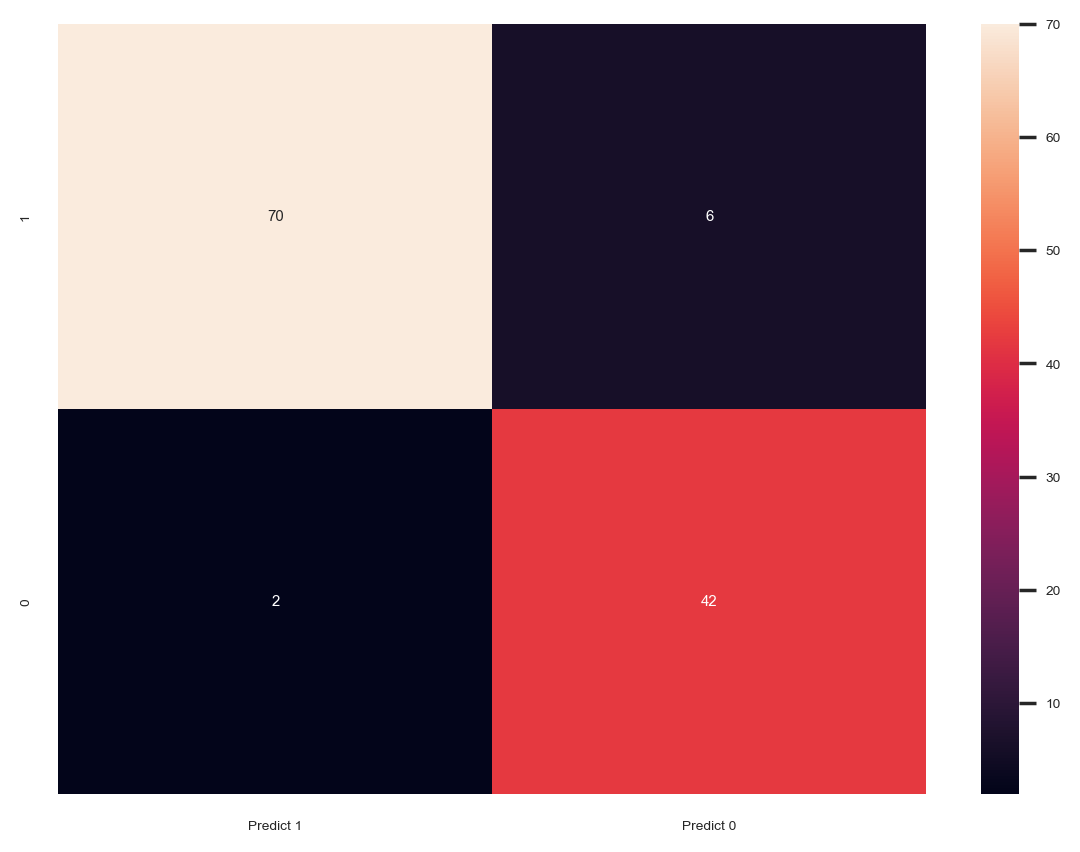

In [406]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### AUC of kNN

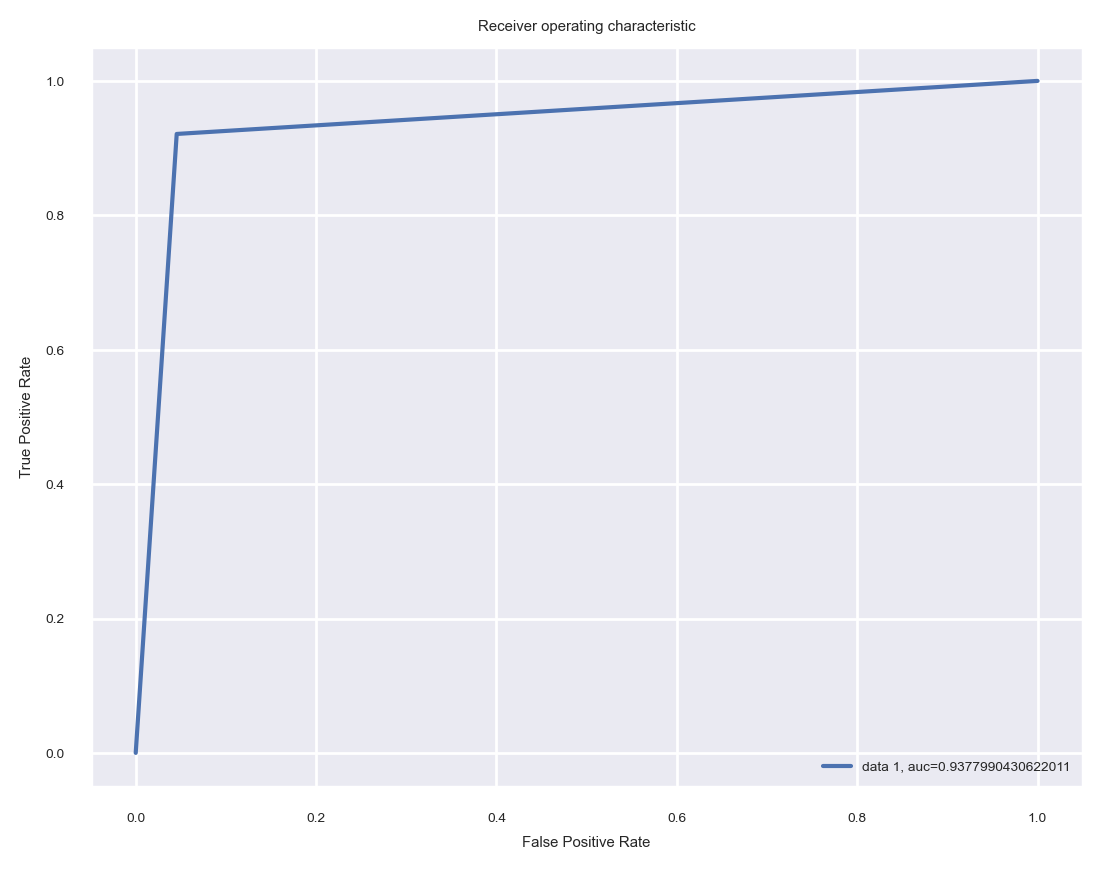

In [407]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [408]:
knn_auc= auc
knn_auc

0.9377990430622011

## SVM

In [409]:
def svm_grid_search(X, y):
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    svm = SVC()
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    svm_gscv.fit(X, y)
    return svm_gscv.best_params_

In [410]:
svm_grid_search(X_train, y_train)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}

### SVM

In [411]:
from sklearn import svm
svm = SVC(gamma=0.8, C=10, kernel='rbf', probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

1.0
0.9666666666666667
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.96      0.99      0.97        76

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [412]:
svm_tacc = svm.score(X_test, y_test)
svm_train_acc = svm.score(X_train, y_train)

#### Confusion Matrix of SVM

<Axes: >

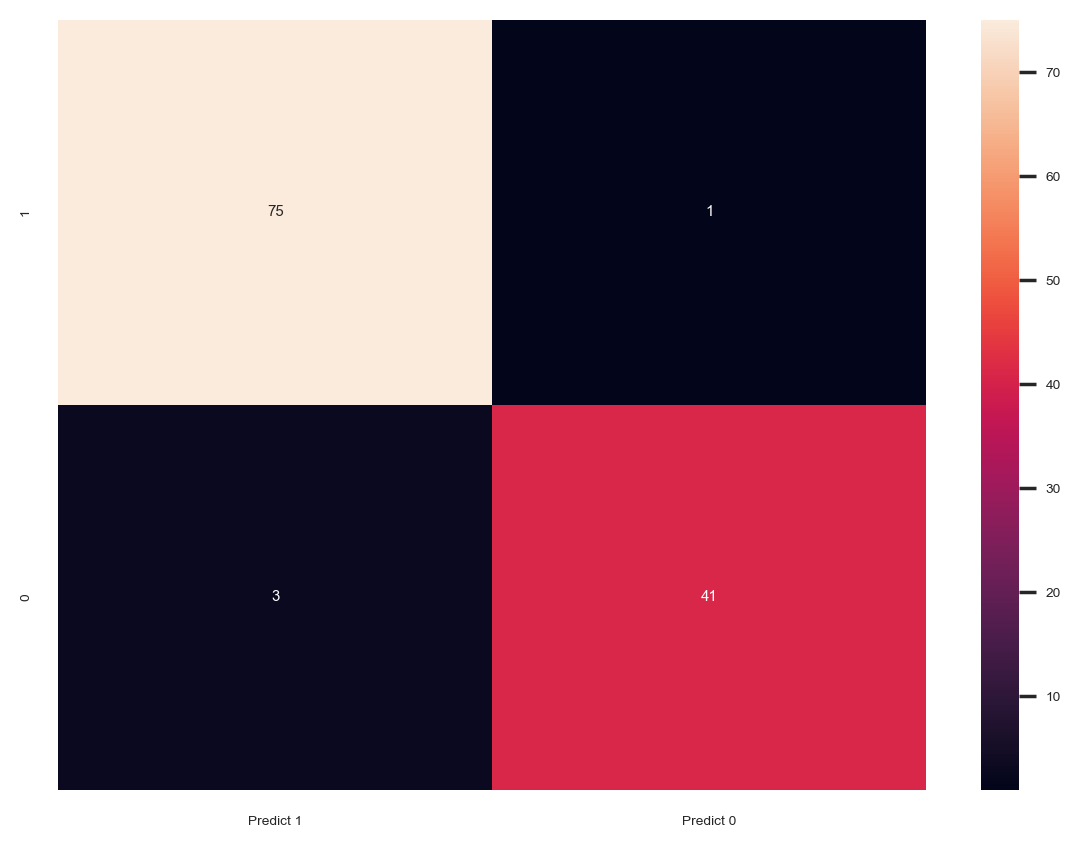

In [413]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### AUC of SVM

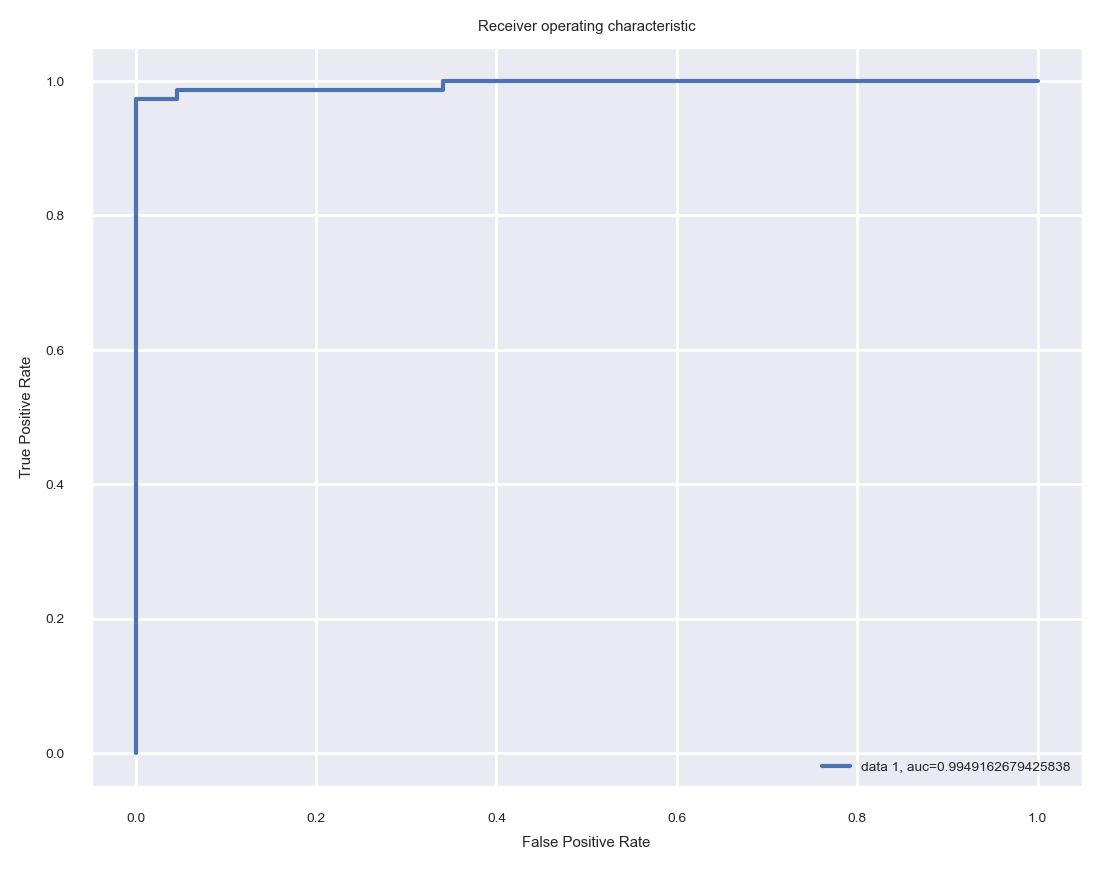

In [414]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [415]:
svm_auc = auc
svm_auc

0.9949162679425838

# Comparision of all Models

## Over Sample Models

In [416]:
def comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list):
    data = {"Model Name": model_list, "Train Accuracy(%)": [i*100 for i in model_train_acc_list], "Test Accuracy(%)": [i*100 for i in model_test_acc_list], "AUC Score": model_auc_list}
    Comparision = pd.DataFrame(data)
    return Comparision

In [417]:
model_list = ["Decision Tree Classifier", "kNN", "SVM"]
model_train_acc_list = [dt_train_acc, knn_train_acc, svm_train_acc]
model_test_acc_list = [dt_tacc, knn_tacc, svm_tacc]
model_auc_list = [dt_auc, knn_auc, svm_auc]
comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list)

,Model Name,Train Accuracy(%),Test Accuracy(%),AUC Score
0,Decision Tree Classifier,100.0,98.333333,0.986842
1,kNN,100.0,93.333333,0.937799
2,SVM,100.0,96.666667,0.994916
